<a href="https://colab.research.google.com/github/KUNWAR-DIVYANSHU/kaggle_practise/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

# data preprocessing , model selection libraries
from sklearn.preprocessing import OrdinalEncoder , LabelEncoder , MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier , export_graphviz
from sklearn.metrics import accuracy_score, confusion_matrix , classification_report
from six import StringIO

from imblearn.over_sampling import SMOTE , BorderlineSMOTE , ADASYN
import pydotplus

# plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files

In [ ]:
app_df = pd.read_csv('https://drive.google.com/uc?id=1gjfTNwapOwg80NlUUkaW4bM9ffqLdtLk')
cr_df = pd.read_csv('https://drive.google.com/uc?id=1tF78o9Qcfc9IScQF1uxMAc3bS9c7SLbN')

In [ ]:
app_df.head(3)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0


In [ ]:
cr_df.head(3)

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0


In [ ]:
app_df.shape

(438557, 18)

In [ ]:
cr_df.shape

(1048575, 3)

In [ ]:
cr_df = cr_df.sort_values(['ID' , 'MONTHS_BALANCE'] , ascending = False)
cr_df = cr_df.groupby('ID').agg(max).reset_index()

In [ ]:
cr_df['STATUS'].value_counts()

X    25005
C    14882
0     5161
1      821
5       54
2       49
3       10
4        3
Name: STATUS, dtype: int64

In [ ]:
cr_df.shape

(45985, 3)

In [ ]:
cr_df['STATUS'].replace({'C':0 , 'X':0} , inplace=True)
cr_df['STATUS'] = cr_df['STATUS'].astype('int')
cr_df['STATUS'] = cr_df['STATUS'].apply(lambda x:1 if x>0 else 0)
cr_df['STATUS'].value_counts()

0    45048
1      937
Name: STATUS, dtype: int64

In [ ]:
df=app_df.join(cr_df.set_index('ID') , on='ID' , how='inner')
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 434812
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   36457 non-null  int64  
 1   CODE_GENDER          36457 non-null  object 
 2   FLAG_OWN_CAR         36457 non-null  object 
 3   FLAG_OWN_REALTY      36457 non-null  object 
 4   CNT_CHILDREN         36457 non-null  int64  
 5   AMT_INCOME_TOTAL     36457 non-null  float64
 6   NAME_INCOME_TYPE     36457 non-null  object 
 7   NAME_EDUCATION_TYPE  36457 non-null  object 
 8   NAME_FAMILY_STATUS   36457 non-null  object 
 9   NAME_HOUSING_TYPE    36457 non-null  object 
 10  DAYS_BIRTH           36457 non-null  int64  
 11  DAYS_EMPLOYED        36457 non-null  int64  
 12  FLAG_MOBIL           36457 non-null  int64  
 13  FLAG_WORK_PHONE      36457 non-null  int64  
 14  FLAG_PHONE           36457 non-null  int64  
 15  FLAG_EMAIL           36457 non-null

ID                         0
CODE_GENDER                0
FLAG_OWN_CAR               0
FLAG_OWN_REALTY            0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
NAME_HOUSING_TYPE          0
DAYS_BIRTH                 0
DAYS_EMPLOYED              0
FLAG_MOBIL                 0
FLAG_WORK_PHONE            0
FLAG_PHONE                 0
FLAG_EMAIL                 0
OCCUPATION_TYPE        11323
CNT_FAM_MEMBERS            0
MONTHS_BALANCE             0
STATUS                     0
dtype: int64

In [ ]:
df['STATUS'].value_counts()

0    35689
1      768
Name: STATUS, dtype: int64

In [ ]:
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,0,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,-22,0


In [ ]:
binary_features = ['CODE_GENDER' , 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY' , 'FLAG_WORK_PHONE' , 'FLAG_PHONE' , 'FLAG_EMAIL']
continious_features = ['CNT_CHILDREN' , 'AMT_INCOME_TOTAL' , 'DAYS_BIRTH' , 'DAYS_EMPLOYED' , 'CNT_FAM_MEMBERS']
categorical_features = ['NAME_INCOME_TYPE' , 'NAME_EDUCATION_TYPE' , 'NAME_FAMILY_STATUS' , 'NAME_HOUSING_TYPE']

In [ ]:
df.drop(['MONTHS_BALANCE' , 'OCCUPATION_TYPE' , 'FLAG_MOBIL'] , axis=1 , inplace=True)

In [ ]:
df['NAME_INCOME_TYPE'].unique()

array(['Working', 'Commercial associate', 'Pensioner', 'State servant',
       'Student'], dtype=object)

In [ ]:
df['NAME_INCOME_TYPE'] = OrdinalEncoder(categories=[['Student' , 'Pensioner', 'Working' ,
 'Commercial associate' ,'State servant']]).fit_transform(df['NAME_INCOME_TYPE'].values.reshape(-1,1))
df['NAME_INCOME_TYPE'].unique()

array([2., 3., 1., 4., 0.])

In [ ]:
encoder2 = LabelEncoder()
categorical_features = ['NAME_EDUCATION_TYPE' , 'NAME_FAMILY_STATUS' , 'NAME_HOUSING_TYPE']
for i in categorical_features:
  df[i] = encoder2.fit_transform(df[i].values.reshape(-1,1))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,STATUS
0,5008804,M,Y,Y,0,427500.0,2.0,1,0,4,-12005,-4542,1,0,0,2.0,0
1,5008805,M,Y,Y,0,427500.0,2.0,1,0,4,-12005,-4542,1,0,0,2.0,0
2,5008806,M,Y,Y,0,112500.0,2.0,4,1,1,-21474,-1134,0,0,0,2.0,0
3,5008808,F,N,Y,0,270000.0,3.0,4,3,1,-19110,-3051,0,1,1,1.0,0
4,5008809,F,N,Y,0,270000.0,3.0,4,3,1,-19110,-3051,0,1,1,1.0,0


In [ ]:
df = pd.get_dummies(df , columns=binary_features , drop_first=True)
df.head()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,STATUS,CODE_GENDER_M,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_Y,FLAG_WORK_PHONE_1,FLAG_PHONE_1,FLAG_EMAIL_1
0,5008804,0,427500.0,2.0,1,0,4,-12005,-4542,2.0,0,1,1,1,1,0,0
1,5008805,0,427500.0,2.0,1,0,4,-12005,-4542,2.0,0,1,1,1,1,0,0
2,5008806,0,112500.0,2.0,4,1,1,-21474,-1134,2.0,0,1,1,1,0,0,0
3,5008808,0,270000.0,3.0,4,3,1,-19110,-3051,1.0,0,0,0,1,0,1,1
4,5008809,0,270000.0,3.0,4,3,1,-19110,-3051,1.0,0,0,0,1,0,1,1


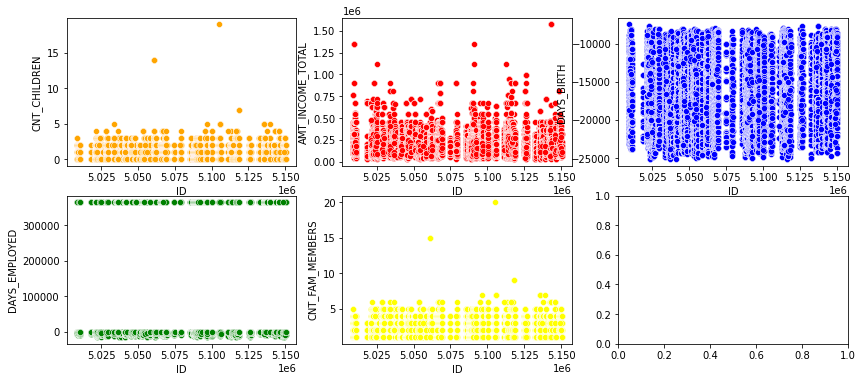

In [ ]:
fig ,ax = plt.subplots(nrows=2 , ncols=3 , figsize=(14,6))
sns.scatterplot(x='ID' , y ='CNT_CHILDREN', data=df , ax=ax[0][0] , color='orange')
sns.scatterplot(x='ID' , y ='AMT_INCOME_TOTAL', data=df , ax=ax[0][1] , color='red')
sns.scatterplot(x='ID' , y ='DAYS_BIRTH', data=df , ax=ax[0][2] , color='blue')
sns.scatterplot(x='ID' , y ='DAYS_EMPLOYED', data=df , ax=ax[1][0] , color='green')
sns.scatterplot(x='ID' , y ='CNT_FAM_MEMBERS', data=df , ax=ax[1][1] , color='yellow')


In [ ]:
df.shape

(36457, 17)

In [ ]:
q_hi = df['AMT_INCOME_TOTAL'].quantile(0.75)
q_low = df['AMT_INCOME_TOTAL'].quantile(0.25)
IQR = q_hi - q_low
lower_range = q_low - 1.5*(IQR)
upper_range = q_hi + 1.5*(IQR)
df = df[(df['AMT_INCOME_TOTAL']>lower_range) & (df['AMT_INCOME_TOTAL']<upper_range)]
df = df[df['CNT_CHILDREN']<8]
df = df[df['CNT_FAM_MEMBERS']<8]
df.shape

(34922, 17)

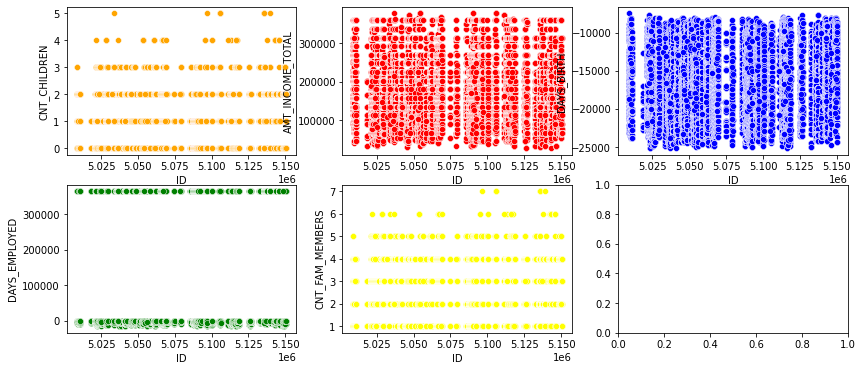

In [ ]:
fig ,ax = plt.subplots(nrows=2 , ncols=3 , figsize=(14,6))
sns.scatterplot(x='ID' , y ='CNT_CHILDREN', data=df , ax=ax[0][0] , color='orange')
sns.scatterplot(x='ID' , y ='AMT_INCOME_TOTAL', data=df , ax=ax[0][1] , color='red')
sns.scatterplot(x='ID' , y ='DAYS_BIRTH', data=df , ax=ax[0][2] , color='blue')
sns.scatterplot(x='ID' , y ='DAYS_EMPLOYED', data=df , ax=ax[1][0] , color='green')
sns.scatterplot(x='ID' , y ='CNT_FAM_MEMBERS', data=df , ax=ax[1][1] , color='yellow')



SMOTE first selects a minority class instance a at random and finds its k nearest minority class neighbors. The synthetic instance is then created by choosing one of the k nearest neighbors b at random and connecting a and b to form a line segment in the feature space. The synthetic instances are generated as a convex combination of the two chosen instances a and b.


In [ ]:
# moves STATUS column to last 
new_cols = [col for col in df.columns if col != 'STATUS'] + ['STATUS']
df = df[new_cols]

X = df.iloc[:,1:-1]
y = df.iloc[:,-1]

X_train , X_test , y_train , y_test = train_test_split(X,y , test_size = 0.2)
mms = MinMaxScaler()
X_scaled = pd.DataFrame(mms.fit_transform(X_train), columns = X_train.columns)

sm = SMOTE(random_state = 42)
X_train_res , y_train_res = sm.fit_resample(X_scaled , y_train)

In [ ]:
y_train.value_counts()

0    27379
1      558
Name: STATUS, dtype: int64

In [ ]:
unique , counts = np.unique(y_train_res , return_counts = True)
print(np.asarray((unique , counts)).T)

[[    0 27379]
 [    1 27379]]


In [ ]:
classifier  = DecisionTreeClassifier()
model = classifier.fit(X_train_res , y_train_res)
X_test_scaled = mms.transform(X_test)
prediction = model.predict(X_test_scaled)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, prediction)))
print(pd.DataFrame(confusion_matrix(y_test,prediction)))

Accuracy Score is 0.9645
      0    1
0  6699  120
1   128   38


In [ ]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      6819
           1       0.24      0.23      0.23       166

    accuracy                           0.96      6985
   macro avg       0.61      0.61      0.61      6985
weighted avg       0.96      0.96      0.96      6985



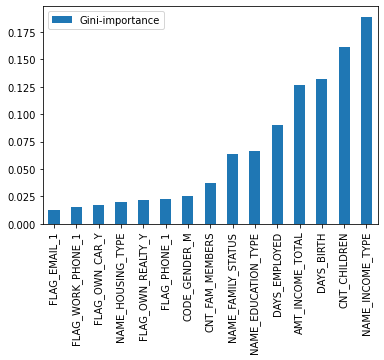

In [ ]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X_train.columns, model.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='bar', rot=90)
model.feature_importances_
importances = model.feature_importances_
indices = np.argsort(importances)

In [ ]:
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 

In [ ]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Decision_Tree.png')

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.330432 to fit



True

In [ ]:
files.download('Decision_Tree.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>